# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [15]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [28]:
url = f"https://api.openweathermap.org/data/2.5/weather?units=imperial&appid="+weather_api_key + "&q=" + "Cookeville"
city_weather = requests.get(url).json()
city_weather 

{'coord': {'lon': -85.5016, 'lat': 36.1628},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 30.11,
  'feels_like': 25.23,
  'temp_min': 26.98,
  'temp_max': 34.65,
  'pressure': 1024,
  'humidity': 77},
 'visibility': 10000,
 'wind': {'speed': 4.61, 'deg': 0},
 'clouds': {'all': 0},
 'dt': 1704413736,
 'sys': {'type': 2,
  'id': 37762,
  'country': 'US',
  'sunrise': 1704372799,
  'sunset': 1704407991},
 'timezone': -21600,
 'id': 4615145,
 'name': 'Cookeville',
 'cod': 200}

In [36]:
city_weather["dt"]

1704413736

In [37]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=imperial&appid="+weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url +  "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | papatowai
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | hawaiian paradise park
Processing Record 10 of Set 1 | uturoa
Processing Record 11 of Set 1 | kapuskasing
Processing Record 12 of Set 1 | kingston
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | palikir - national government center
Processing Record 15 of Set 1 | taiohae
City not found. Skipping...
Processing Record 16 of Set 1 | santyoku
Processing Record 17 of Set 1 | aykhal
Processing Record 18 of Set 1 | saint-francois
Processing Record 19 of Set 1 | dinghaicun
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of 

In [38]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [39]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,64.99,92,79,7.90,ZA,1704414529
1,blackmans bay,-43.0167,147.3167,69.53,56,53,1.99,AU,1704414530
2,bethel,41.3712,-73.4140,33.89,50,0,14.97,US,1704414530
3,avarua,-21.2078,-159.7750,82.45,78,75,18.41,CK,1704414530
4,papatowai,-46.5619,169.4708,54.01,50,88,11.21,NZ,1704414531


In [40]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [2]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,64.99,92,79,7.90,ZA,1704414529
1,blackmans bay,-43.0167,147.3167,69.53,56,53,1.99,AU,1704414530
2,bethel,41.3712,-73.4140,33.89,50,0,14.97,US,1704414530
3,avarua,-21.2078,-159.7750,82.45,78,75,18.41,CK,1704414530
4,papatowai,-46.5619,169.4708,54.01,50,88,11.21,NZ,1704414531


In [3]:
## Convert timestamp date to a datetime object using the fromtimestamp() function.
timestamp = city_data_df['Date'][0]
dt_object = datetime.fromtimestamp(timestamp)
print("Converted Datetime:", dt_object)

Converted Datetime: 2024-01-04 16:28:49


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

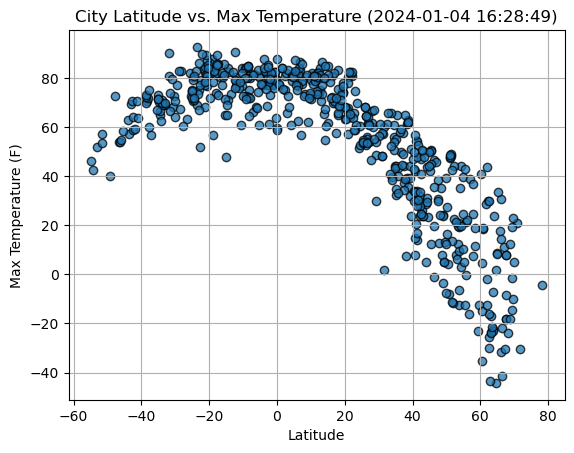

In [4]:
# Build scatter plot 1 for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({dt_object})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

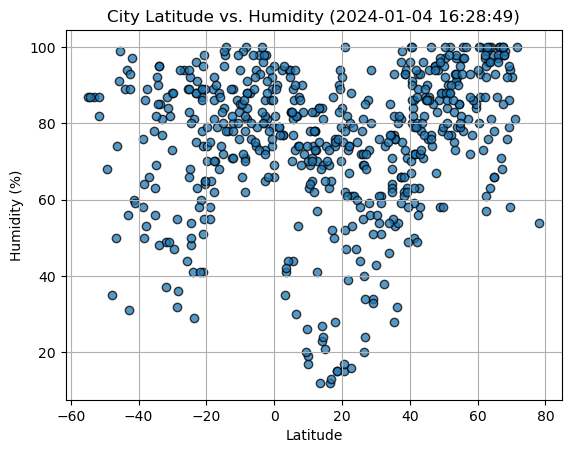

In [5]:
# Build the scatter plots 2 for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({dt_object})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

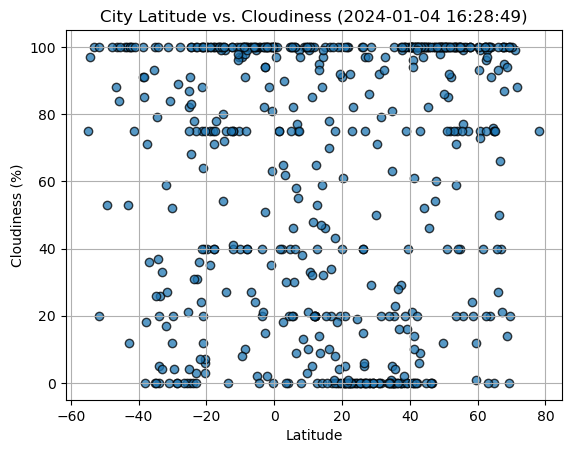

In [6]:
# Build the scatter plots 3 for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({dt_object})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

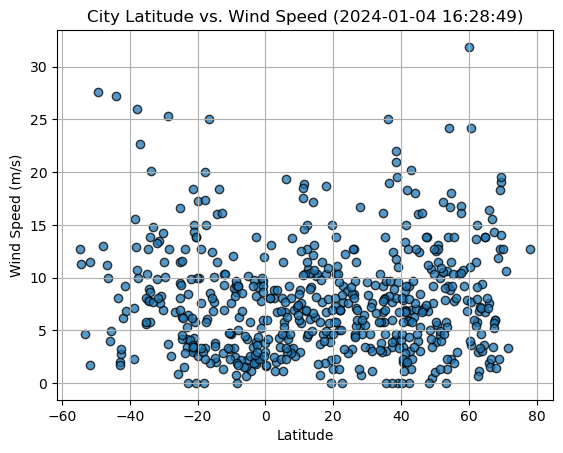

In [7]:
# Build the scatter plots 4 for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({dt_object})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [8]:
# Define a function to create Linear Regression plots

def linear_regression_plots(x_values ,y_values, line_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print({line_eq})
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.annotate(line_eq,line_coordinates,fontsize=15,color="red")
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [9]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>= 0]
# Display sample data
northern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bethel,41.3712,-73.4140,33.89,50,0,14.97,US,1704414530
8,hawaiian paradise park,19.5933,-154.9731,77.88,79,100,14.97,US,1704414533
10,kapuskasing,49.4169,-82.4331,5.09,78,100,9.22,CA,1704414534
11,kingston,17.9970,-76.7936,83.35,76,75,10.36,JM,1704414535
13,palikir - national government center,6.9248,158.1611,86.74,74,75,9.22,FM,1704414536
...,...,...,...,...,...,...,...,...,...
567,la rioja,42.2500,-2.5000,33.58,87,99,4.32,ES,1704414932
568,astrakhan,46.3497,48.0408,35.47,100,0,6.71,RU,1704414933
570,grinnell,41.7430,-92.7224,30.18,79,0,1.99,US,1704414934


In [10]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]< 0]
# Display sample data
southern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,64.99,92,79,7.90,ZA,1704414529
1,blackmans bay,-43.0167,147.3167,69.53,56,53,1.99,AU,1704414530
3,avarua,-21.2078,-159.7750,82.45,78,75,18.41,CK,1704414530
4,papatowai,-46.5619,169.4708,54.01,50,88,11.21,NZ,1704414531
5,punta arenas,-53.1500,-70.9167,51.91,87,100,4.61,CL,1704414531
...,...,...,...,...,...,...,...,...,...
561,moranbah,-22.0016,148.0466,89.78,41,7,9.82,AU,1704414928
562,puerto aysen,-45.4000,-72.7000,58.50,99,100,4.92,CL,1704414928
565,puerto santa,-8.9906,-78.6456,71.47,86,100,8.25,PE,1704414931


###  Temperature vs. Latitude Linear Regression Plot

{'y = -1.4x +92.66'}
The r-value is: 0.7647986985727014


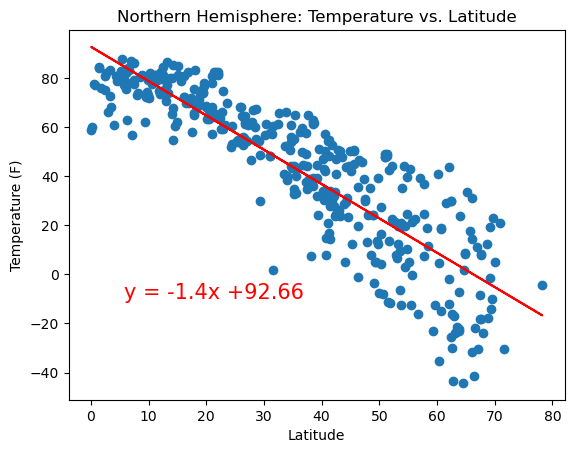

In [11]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plt.title('Northern Hemisphere: Temperature vs. Latitude')
plt.ylabel('Temperature (F)')
linear_regression_plots(x_values,y_values,(5.8,-10))

{'y = 0.39x +82.34'}
The r-value is: 0.3000407466704864


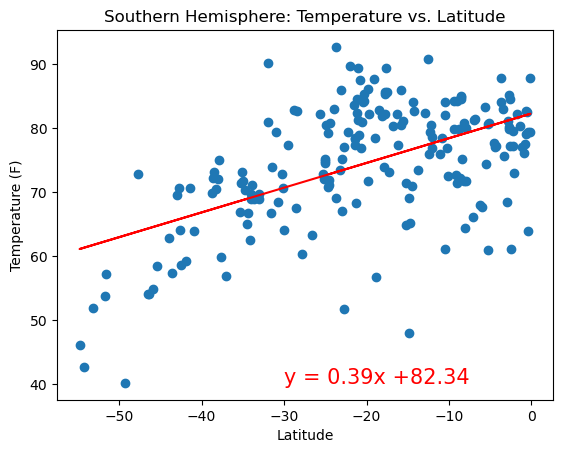

In [12]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plt.title('Southern Hemisphere: Temperature vs. Latitude')
plt.ylabel('Temperature (F)')
linear_regression_plots(x_values ,y_values, (-30,40))

**Discussion about the linear relationship:** 
- Northern Hemisphere has strong positive correlation between latitude & temperature; and negative slope.
- Southern Hemisphere has a weak positive correlation between latitude & temperature; and positive slope. 
- Maximum temperatures increase for both regions going towards the equator (0). 

### Humidity vs. Latitude Linear Regression Plot

{'y = 0.41x +59.73'}
The r-value is: 0.16564859052520872


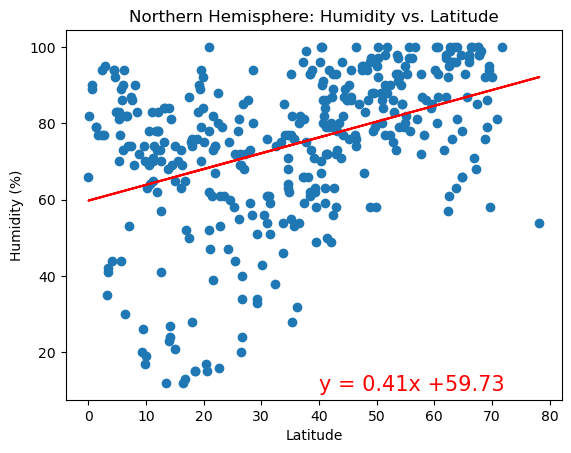

In [415]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plt.title('Northern Hemisphere: Humidity vs. Latitude')
plt.ylabel('Humidity (%)')
linear_regression_plots(x_values,y_values,(40,10))

{'y = 0.29x +83.17'}
The r-value is: 0.06056444461921228


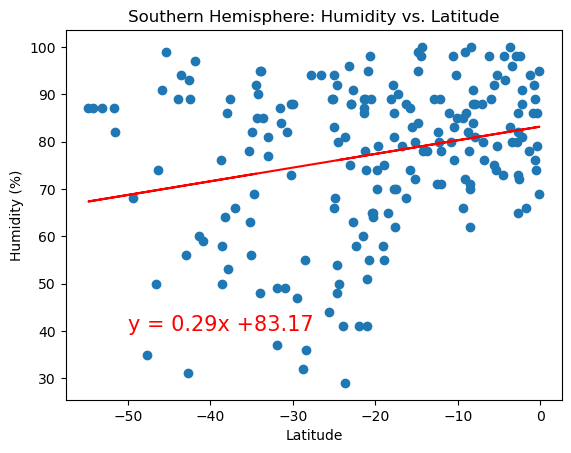

In [416]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plt.title('Southern Hemisphere: Humidity vs. Latitude')
plt.ylabel('Humidity (%)')
linear_regression_plots(x_values ,y_values, (-50,40))

**Discussion about the linear relationship:** 
- Northern Hemisphere has none/very weak correlation between latitude & humidity.
- Southern Hemisphere has none correlation between latitude & humidity.
- The data points are too widespread on both scatterplots, denying any meaningful relationship among the two parameters. Even if slopes are positive, being closer to the equator has no significant effect on humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

{'y = 0.54x +38.48'}
The r-value is: 0.0664401975992597


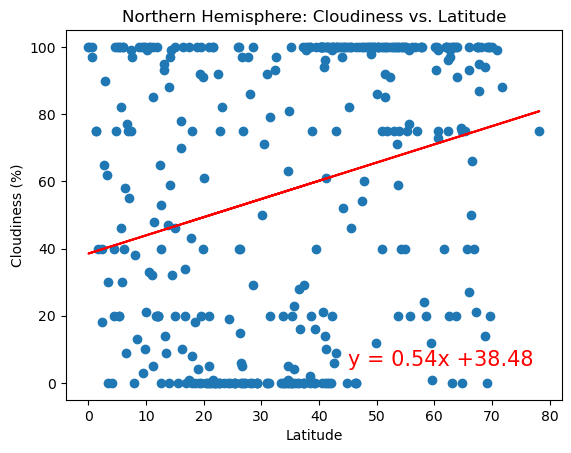

In [417]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plt.title('Northern Hemisphere: Cloudiness vs. Latitude')
plt.ylabel('Cloudiness (%)')
linear_regression_plots(x_values,y_values,(45,5))

{'y = 0.35x +73.03'}
The r-value is: 0.016950436309297903


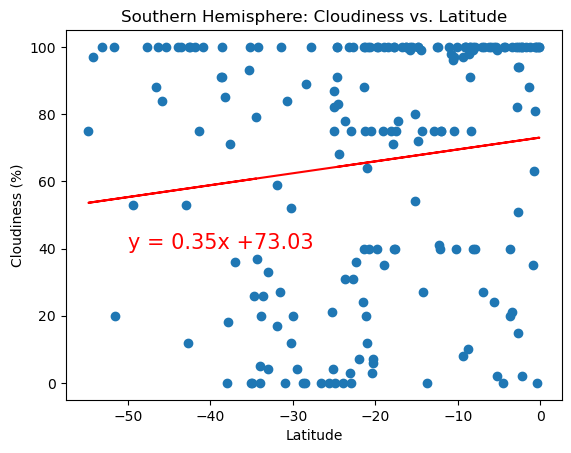

In [418]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plt.title('Southern Hemisphere: Cloudiness vs. Latitude')
plt.ylabel('Cloudiness (%)')
linear_regression_plots(x_values ,y_values, (-50,40))

**Discussion about the linear relationship:** 
- Northern Hemisphere has none correlation between latitude & cloudiness.
- Southern Hemisphere has none correlation between latitude & cloudiness.
- The data points are too widespread on both scatterplots, denying any meaningful relationship among the two parameters. Even if slopes are positive, neither being closer to or extremely far from the equator has any significant effect on cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

{'y = 0.03x +6.6'}
The r-value is: 0.017501330457379664


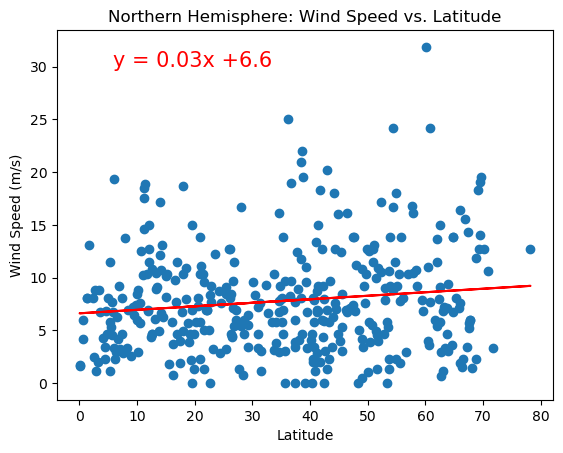

In [419]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plt.title('Northern Hemisphere: Wind Speed vs. Latitude')
plt.ylabel('Wind Speed (m/s)')
linear_regression_plots(x_values,y_values,(5.8,30))

{'y = -0.12x +5.34'}
The r-value is: 0.08543255310090087


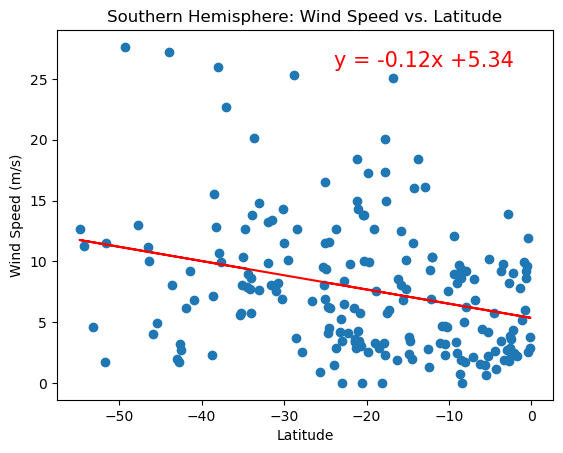

In [420]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plt.title('Southern Hemisphere: Wind Speed vs. Latitude')
plt.ylabel('Wind Speed (m/s)')
linear_regression_plots(x_values ,y_values, (-24,26))

**Discussion about the linear relationship:** 
- Northern Hemisphere has none correlation between latitude & wind speed; and positive slope.
- Southern Hemisphere has none correlation between latitude & wind speed; and negative slope. 
- Wind speed does not relatively change regardless of cities being closer or further away from the equator in both hemispheres.
- Overall, only temperature has a significant linear relationship with latitude. 